In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from itertools import product

# Producing Tables

In [ ]:
p_s = [500,1000]
d_s = [4]
list_all = []

for p in p_s:
  for d in d_s:
    with open("df_performance_applam_lat_p{0}_d{1}.csv".format(p,d), newline='') as my_csv_applam:
        df_applam = pd.read_csv(my_csv_applam)
        df_applam = df_applam.iloc[: , 1:]
        df_applam = df_applam.loc[:, ['model', 'p', 'd', 'intensity', 'mode_nclus', 'avg_nclus', 'ari_best_clus']]
        df_applam = df_applam.rename(columns={'intensity': 'parameter'})

    with open("df_performance_lamb_lat_p{0}_d{1}.csv".format(p,d), newline='') as my_csv_lamb:
        df_lamb = pd.read_csv(my_csv_lamb)
        df_lamb = df_lamb.iloc[: , 1:]
        df_lamb = df_lamb.loc[:, ['model', 'p', 'd', 'conc_dir', 'mode_nclus', 'avg_nclus', 'ari_best_clus']]
        df_lamb = df_lamb.rename(columns={'conc_dir': 'parameter'})

    list_all.append(df_applam)
    list_all.append(df_lamb)

df_all = pd.concat(list_all)
df_all.to_csv("df_all_results_table_lat.csv")

In [ ]:
p_s = [500,1000]
d_s = [4]
conc_dir_s = [0.1, 0.5, 1]
rho_s = [0.5, 1, 5]

### Produce one csv for each d (for latent just one d)





In [ ]:
with open("df_all_results_table_lat.csv", newline='') as my_csv_all:
        df_all = pd.read_csv(my_csv_all)

d = 4
data = df_all.loc[df_all['d']==d]

data_agg = data.groupby(['p','model', 'parameter']).agg(
    avg_avg_nclus = pd.NamedAgg(column = 'avg_nclus', aggfunc = np.mean),
    avg_mode_nclus = pd.NamedAgg(column = 'mode_nclus', aggfunc = np.mean),
    avg_ari_best = pd.NamedAgg(column = 'ari_best_clus', aggfunc = np.mean)
)


ar_ind = []

for p in p_s:

  ar_lamb = [np.repeat(p,3),np.repeat("Lamb",3),conc_dir_s]
  ar_lamb = list(zip(*ar_lamb))

  ar_app = [np.repeat(p,3),np.repeat("APPLAM",3),rho_s]
  ar_app = list(zip(*ar_app))

  ar_ind = [*ar_ind, *ar_app, *ar_lamb]


index = pd.MultiIndex.from_tuples(ar_ind, names=["Data dimension", "Model", "Parameter"])

df_final = data_agg.set_index(index)

df_final.to_csv("summarizing_dataframe_lat_d_{0}.csv".format(d))



### Produce the table in latex format

In [8]:
d = 4

with open("summarizing_dataframe_lat_d_{0}.csv".format(d), newline='') as my_csv:
    df = pd.read_csv(my_csv, index_col=[0,1,2])

df["avg_avg_nclus"] = df["avg_avg_nclus"].round(2)
df["avg_mode_nclus"] = df["avg_mode_nclus"].round(2)

df["avg_ari_best"] = df["avg_ari_best"].round(2)

print("d = ",d)

print(df.to_latex())

d =  4
\begin{tabular}{lllrrr}
\toprule
     &      &     &  avg\_avg\_nclus &  avg\_mode\_nclus &  avg\_ari\_best \\
Data dimension & Model & Parameter &                &                 &               \\
\midrule
500  & APPLAM & 0.5 &           3.61 &            3.50 &          0.77 \\
     &      & 1.0 &           3.91 &            3.95 &          0.88 \\
     &      & 5.0 &           5.11 &            5.00 &          0.97 \\
     & Lamb & 0.1 &          21.71 &           20.10 &          0.66 \\
     &      & 0.5 &          21.96 &           20.70 &          0.65 \\
     &      & 1.0 &          22.72 &           21.35 &          0.64 \\
1000 & APPLAM & 0.5 &           3.89 &            3.85 &          0.79 \\
     &      & 1.0 &           4.44 &            4.35 &          0.88 \\
     &      & 5.0 &           6.37 &            6.30 &          0.90 \\
     & Lamb & 0.1 &          23.40 &           23.20 &          0.63 \\
     &      & 0.5 &          24.02 &           22.45 &      

<ipython-input-8-aa922fae58ec>:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


# Producing boxplots

In [ ]:
p_s = [500,1000]
d_s = [4]
list_all = []

for p in p_s:
  for d in d_s:
    with open("df_performance_applam_lat_p{0}_d{1}.csv".format(p,d), newline='') as my_csv_applam:
        df_applam = pd.read_csv(my_csv_applam)
        df_applam = df_applam.iloc[: , 1:]
        df_applam = df_applam.loc[:, ['model', 'p', 'd', 'intensity', 'mode_nclus', 'avg_nclus', 'ari_best_clus']]

    with open("df_performance_lamb_lat_p{0}_d{1}.csv".format(p,d), newline='') as my_csv_lamb:
        df_lamb = pd.read_csv(my_csv_lamb)
        df_lamb = df_lamb.iloc[: , 1:]
        df_lamb = df_lamb.loc[:, ['model', 'p', 'd', 'conc_dir', 'mode_nclus', 'avg_nclus', 'ari_best_clus']]

    list_all.append(df_applam)
    list_all.append(df_lamb)

df_all = pd.concat(list_all)
df_all.to_csv("df_all_results_plot_lat.csv")

### Plot the boxplots

In [ ]:
import seaborn as sns
with open("df_all_results_plot_lat.csv", newline='') as my_csv_all:
        df_all = pd.read_csv(my_csv_all)

df_all = df_all.rename(columns = {'conc_dir' : 'concentration'})

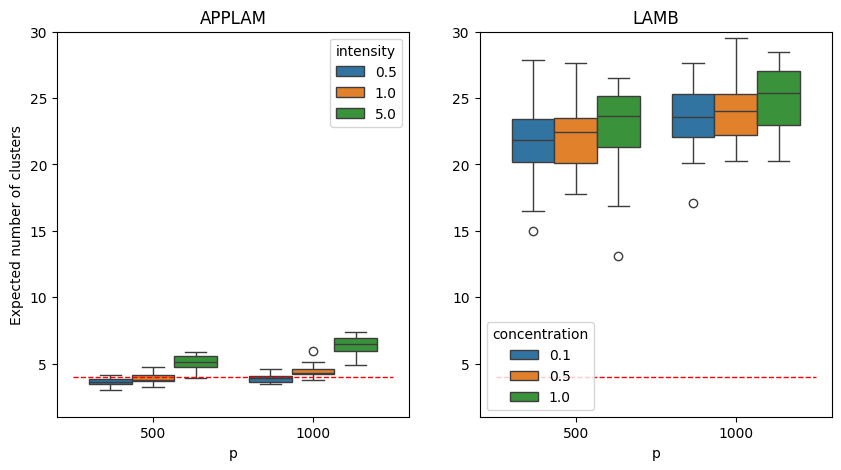

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

d = 4

# APPLAM row
data = df_all[(df_all['model']=='APPLAM') & (df_all['d']==d)]
ax1 = sns.boxplot(ax = axs[0], data = df_all,
            x = 'p',
            y = 'avg_nclus',
            hue = 'intensity',
            palette = 'tab10')
ax1.set(ylabel='Expected number of clusters')
ax1.set(ylim=(1, 30))
ax1.set(title = "APPLAM")
ax1.hlines(y = 4, xmin = -0.5, xmax = 1.5, color = 'red', linestyle ='dashed', linewidth = 1)

# Lamb row
data = df_all[(df_all['model']=='Lamb') & (df_all['d']==d)]
ax2 = sns.boxplot(ax = axs[1], data= df_all,
            x = 'p',
            y = 'avg_nclus',
            hue = 'concentration',
            palette = 'tab10' )

#ax2.set(ylabel='Expected number of clusters')
ax2.set(ylabel=None)
ax2.set(ylim=(1, 30))
ax2.set(title = "LAMB")
ax2.hlines(y = 4, xmin = -0.5, xmax = 1.5, color = 'red', linestyle ='dashed', linewidth = 1)



plt.savefig('Nclus_latent.pdf',format="pdf", bbox_inches="tight")


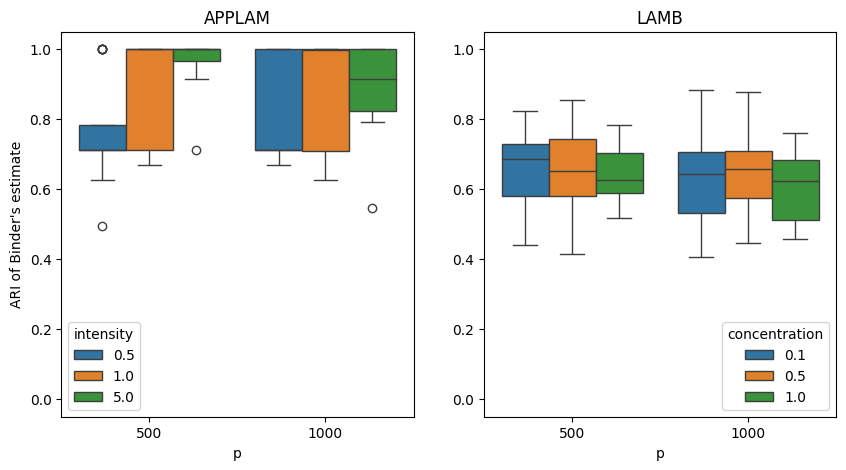

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

d = 4

# APPLAM row
data = df_all[(df_all['model']=='APPLAM') & (df_all['d']==d)]
ax1 = sns.boxplot(ax = axs[0], data = data,
            x = 'p',
            y = 'ari_best_clus',
            hue = 'intensity',
            palette = 'tab10')
ax1.set(ylabel='ARI of Binder\'s estimate')
ax1.set(ylim=(-0.05, 1.05))
ax1.set(title = "APPLAM")


# Lamb row
data = df_all[(df_all['model']=='Lamb') & (df_all['d']==d)]
ax2 = sns.boxplot(ax = axs[1], data= data,
            x = 'p',
            y = 'ari_best_clus',
            hue = 'concentration',
            palette = 'tab10' )
#ax2.set(ylabel='ARI of Binder\'s estimate')
ax2.set(ylabel=None)
ax2.set(ylim=(-0.05, 1.05))
ax2.set(title = "LAMB")


plt.savefig('Aris_latent.pdf',format="pdf", bbox_inches="tight")
